In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1XmcZ9xrqgM_LTA1H2A3YRXrCuuiHBUmT" -O "train_data.txt"

--2020-11-06 04:27:42--  https://drive.google.com/uc?export=download&id=1XmcZ9xrqgM_LTA1H2A3YRXrCuuiHBUmT
Resolving drive.google.com (drive.google.com)... 108.177.125.101, 108.177.125.113, 108.177.125.138, ...
Connecting to drive.google.com (drive.google.com)|108.177.125.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-94-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/56ti305j77rjp541hotcobjllhfslii4/1604636850000/13472183013488020071/*/1XmcZ9xrqgM_LTA1H2A3YRXrCuuiHBUmT?e=download [following]
--2020-11-06 04:27:43--  https://doc-0c-94-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/56ti305j77rjp541hotcobjllhfslii4/1604636850000/13472183013488020071/*/1XmcZ9xrqgM_LTA1H2A3YRXrCuuiHBUmT?e=download
Resolving doc-0c-94-docs.googleusercontent.com (doc-0c-94-docs.googleusercontent.com)... 108.177.97.132, 2404:6800:4008:c00::84
Connecting to doc-0c-94-docs.googleusercontent.com (do

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from collections import Counter 
import re

In [ ]:
f = open('train_data.txt', 'r')

vocab=Counter()
sentences = []
sentence = []
# 파이썬의 set은 중복을 허용하지 않는다. 개체명 태깅의 경우의 수.
# 즉, 종류를 알아내기 위함이다.  
ner_set = set()

for line in f:
    if len(line)==0 or line.startswith('-DOCSTART') or line[0]=="\n":
        if len(sentence) > 0:
            sentences.append(sentence)
            sentence=[]
        continue

    # 공백을 기준으로 속성을 구분한다.
    splits = line.split('\t')
    # 개체명 태깅 뒤에 붙어있는 줄바꿈 표시 \n을 제거한다.
    splits[-1] = re.sub(r'\n', '', splits[-1])
    word=splits[1]
    # 단어마다 빈도 수가 몇 인지 기록한다.
    vocab[word]=vocab[word]+1
    # 단어와 개체명 태깅만 기록한다.
    sentence.append([word, splits[-1]])
    # set에다가 개체명 태깅을 집어 넣는다. 중복은 허용되지 않으므로
    # 나중에 개체명 태깅이 어떤 종류가 있는지 확인할 수 있다.
    ner_set.add(splits[-1])

In [ ]:
sentences[:3]

[[['비토리오', 'PER_B'],
  ['양일', 'DAT_B'],
  ['만에', '-'],
  ['영사관', 'ORG_B'],
  ['감호', 'CVL_B'],
  ['용퇴,', '-'],
  ['항룡', '-'],
  ['압력설', '-'],
  ['의심만', '-'],
  ['가율', '-']],
 [['이', '-'],
  ['음경동맥의', '-'],
  ['직경이', '-'],
  ['8', 'NUM_B'],
  ['19mm입니다', 'NUM_B'],
  ['.', '-']],
 [['9세이브로', 'NUM_B'],
  ['구완', '-'],
  ['30위인', 'NUM_B'],
  ['LG', 'ORG_B'],
  ['박찬형은', 'PER_B'],
  ['평균자책점이', '-'],
  ['16.45로', 'NUM_B'],
  ['준수한', '-'],
  ['편이지만', '-'],
  ['22⅓이닝', 'NUM_B'],
  ['동안', '-'],
  ['피홈런이', '-'],
  ['31개나', 'NUM_B'],
  ['된다', '-'],
  ['.', '-']]]

In [ ]:
len(vocab)

331196

In [ ]:
ner_set

{'-',
 'AFW_B',
 'AFW_I',
 'ANM_B',
 'ANM_I',
 'CVL_B',
 'CVL_I',
 'DAT_B',
 'DAT_I',
 'EVT_B',
 'EVT_I',
 'FLD_B',
 'FLD_I',
 'LOC_B',
 'LOC_I',
 'MAT_B',
 'MAT_I',
 'NUM_B',
 'NUM_I',
 'ORG_B',
 'ORG_I',
 'PER_B',
 'PER_I',
 'PLT_B',
 'PLT_I',
 'TIM_B',
 'TIM_I',
 'TRM_B',
 'TRM_I'}

In [ ]:
vocab_sorted = sorted(vocab.items(), key=lambda x: x[1], reverse=True)

In [ ]:
vocab_sorted[-1]

('레노버가', 1)

In [ ]:
word_to_idx = { w: i + 2 for i, (w, n) in enumerate(vocab_sorted) }

In [ ]:
word_to_idx['PAD'] = 0
word_to_idx['OOV'] = 1

In [ ]:
ner_to_idx = {}
ner_to_idx['PAD'] = 0
i = 1

for ner in ner_set:
  ner_to_idx[ner] = i
  i += 1

ner_to_idx

{'-': 21,
 'AFW_B': 6,
 'AFW_I': 1,
 'ANM_B': 23,
 'ANM_I': 10,
 'CVL_B': 3,
 'CVL_I': 7,
 'DAT_B': 24,
 'DAT_I': 12,
 'EVT_B': 13,
 'EVT_I': 19,
 'FLD_B': 16,
 'FLD_I': 18,
 'LOC_B': 26,
 'LOC_I': 8,
 'MAT_B': 25,
 'MAT_I': 14,
 'NUM_B': 29,
 'NUM_I': 2,
 'ORG_B': 27,
 'ORG_I': 15,
 'PAD': 0,
 'PER_B': 11,
 'PER_I': 28,
 'PLT_B': 22,
 'PLT_I': 17,
 'TIM_B': 4,
 'TIM_I': 20,
 'TRM_B': 5,
 'TRM_I': 9}

In [ ]:
data_x = []

for s in sentences:
  temp_x = []

  for w, label in s:
    data = word_to_idx.get(w, 1)

    if data:
      temp_x.append(word_to_idx.get(w, 1))
    else:
      temp_x.append(word_to_idx['PAD'])

  data_x.append(temp_x)

In [ ]:
index_to_word = {}

for k,v in word_to_idx.items():
  index_to_word[v] = k

tmp = []

for idx in data_x[0]:
  tmp.append(index_to_word[idx])

print(tmp)

['비토리오', '양일', '만에', '영사관', '감호', '용퇴,', '항룡', '압력설', '의심만', '가율']


In [ ]:
data_y = []

for s in sentences:
  tmp_y = []

  for w, label in s:
    tmp_y.append(ner_to_idx.get(label))

  data_y.append(tmp_y)

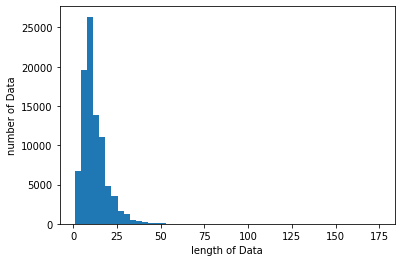

In [ ]:
import matplotlib.pyplot as plt

plt.hist([len(s) for s in data_x], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [ ]:
print(max(len(l) for l in data_x)) # 전체 데이터에서 길이가 가장 긴 샘플의 길이 출력
print(max(len(l) for l in data_y)) # 전체 데이터에서 길이가 가장 긴 샘플의 길이 출력

175
175


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
pad_x = pad_sequences(data_x, padding='post', maxlen=60)
pad_y = pad_sequences(data_y, padding='post', maxlen=60)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(pad_x, pad_y, test_size=0.2)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional, TimeDistributed
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall, AUC

In [ ]:
n_words = len(word_to_idx)
n_labels = len(ner_to_idx)

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=n_words, output_dim=16, input_length=60))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(TimeDistributed(Dense(n_labels, activation='softmax')))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', Precision(), Recall(), AUC()])

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
history = model.fit(x_train, y_train, epochs=40, batch_size=128, validation_split=0.2)

Epoch 1/40
450/450 [==============================] - 31s 70ms/step - loss: 0.5215 - accuracy: 0.9077 - precision: 0.9336 - recall: 0.8370 - auc: 0.9913 - val_loss: 0.2876 - val_accuracy: 0.9352 - val_precision: 0.9414 - val_recall: 0.9300 - val_auc: 0.9956
Epoch 2/40
450/450 [==============================] - 31s 68ms/step - loss: 0.2697 - accuracy: 0.9367 - precision: 0.9514 - recall: 0.9296 - auc: 0.9963 - val_loss: 0.2548 - val_accuracy: 0.9364 - val_precision: 0.9608 - val_recall: 0.9280 - val_auc: 0.9968
Epoch 3/40
450/450 [==============================] - 30s 68ms/step - loss: 0.2209 - accuracy: 0.9405 - precision: 0.9794 - recall: 0.9279 - auc: 0.9977 - val_loss: 0.2077 - val_accuracy: 0.9435 - val_precision: 0.9806 - val_recall: 0.9274 - val_auc: 0.9979
Epoch 4/40
450/450 [==============================] - 30s 68ms/step - loss: 0.1642 - accuracy: 0.9535 - precision: 0.9950 - recall: 0.9368 - auc: 0.9987 - val_loss: 0.1855 - val_accuracy: 0.9502 - val_precision: 0.9828 - val_r

In [ ]:
model.evaluate(x_test, y_test)[1]

563/563 [==============================] - 4s 8ms/step - loss: 0.3518 - accuracy: 0.9617 - precision: 0.9641 - recall: 0.9611 - auc: 0.9865


0.9616842865943909

In [1]:
import numpy as np

idx_to_word = {}
for k,v in word_to_idx.items():
  idx_to_word[v] = k

idx_to_ner = {}
for k,v in ner_to_idx.items():
  idx_to_ner[v] = k

y_predicted = model.predict(np.array([x_test[0]]))
y_predicted = np.argmax(y_predicted, axis=-1)
true = np.argmax(y_test[0], -1)

print("{:15}|{:5}|{}".format("단어", "실제값", "예측값"))
print(35 * "-")

for w, t, pred in zip(x_test[10], true, y_predicted[10]):
    if w != 0: # PAD값은 제외함.
        print("{:17}: {:7} {}".format(idx_to_word[w], idx_to_ner[t], idx_to_ner[pred]))


NameError: ignored